In [1]:
# IMPORTA BIBLIOTECAS E LE A PLANILHA

import pandas as pd
import openpyxl
import plotly.express as px
import plotly.graph_objects as go

eleicao_2020 = pd.read_excel("eleicao_vereador_2020_spa.xlsx")

In [2]:
# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel
for nr in eleicao_2020['nr_votavel'].unique():
    soma_votos = eleicao_2020[eleicao_2020['nr_votavel'] == nr]['qt_votos'].sum()
    resultados[nr] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_df = pd.DataFrame(list(resultados.items()), columns=['nr_votavel', 'total_votos'])

# FILTRO CANDIDATO

candidato_x = resultado_df[resultado_df['nr_votavel'] == 77000]
candidato_x

,nr_votavel,total_votos
13,77000,1394


In [3]:
# Ordena o DataFrame pela coluna 'total_votos' em ordem decrescente e pega os 10 primeiros
top_10 = resultado_df.sort_values('total_votos', ascending=False).head(12)
top_10 = top_10[top_10['nr_votavel'] != 95] # remoção de linha com valor referente ao voto nulo/branco
top_10 = top_10[top_10['nr_votavel'] != 96] # remoção de linha com valor referente ao voto nulo/branco
top_10

,nr_votavel,total_votos
13,77000,1394
137,11123,1062
32,12345,1038
9,10555,931
48,77444,901
144,77456,884
7,22565,858
3,77200,848
30,22999,810
87,11111,807


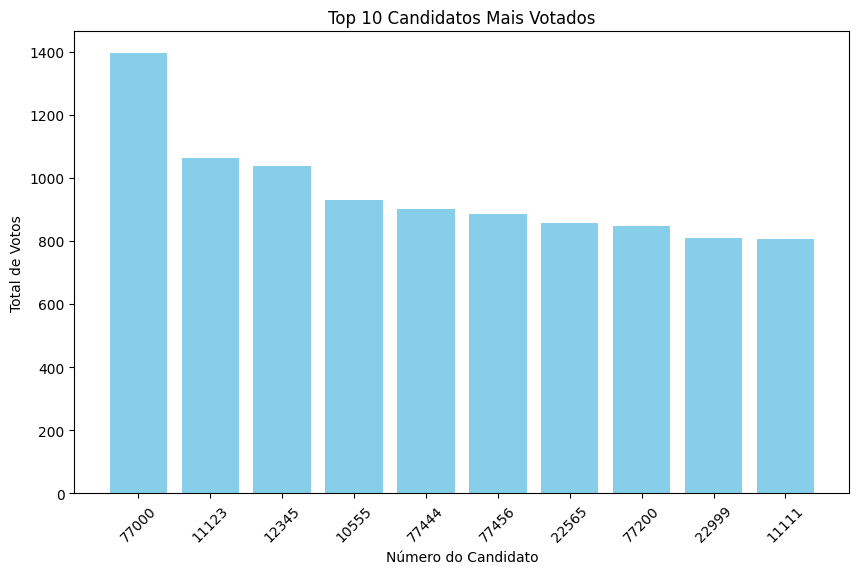

In [4]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Leitura da planilha
eleicao_2020 = pd.read_excel("eleicao_vereador_2020_spa.xlsx")

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel para calcular a soma dos votos
for nr in eleicao_2020['nr_votavel'].unique():
    soma_votos = eleicao_2020[eleicao_2020['nr_votavel'] == nr]['qt_votos'].sum()
    resultados[nr] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_df = pd.DataFrame(list(resultados.items()), columns=['nr_votavel', 'total_votos'])

# Ordena o DataFrame pela coluna 'total_votos' em ordem decrescente e pega os 10 primeiros
top_10 = resultado_df.sort_values('total_votos', ascending=False).head(12)

# Remoção de linhas com valores de votos nulos ou brancos
top_10 = top_10[(top_10['nr_votavel'] != 95) & (top_10['nr_votavel'] != 96)]

# Gráfico dos 10 candidatos mais votados
plt.figure(figsize=(10, 6))
plt.bar(top_10['nr_votavel'].astype(str), top_10['total_votos'], color='skyblue')
plt.xlabel("Número do Candidato")
plt.ylabel("Total de Votos")
plt.title("Top 10 Candidatos Mais Votados")
plt.xticks(rotation=45)
plt.show()


In [5]:
# Importação de bibliotecas
import pandas as pd
import plotly.express as px

# Leitura da planilha
eleicao_2020 = pd.read_excel("eleicao_vereador_2020_spa.xlsx")

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel para calcular a soma dos votos
for nr in eleicao_2020['nr_votavel'].unique():
    soma_votos = eleicao_2020[eleicao_2020['nr_votavel'] == nr]['qt_votos'].sum()
    resultados[nr] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_df = pd.DataFrame(list(resultados.items()), columns=['nr_votavel', 'total_votos'])

# Ordena o DataFrame pela coluna 'total_votos' em ordem decrescente e pega os 10 primeiros
top_10 = resultado_df.sort_values('total_votos', ascending=False).head(12)

# Remoção de linhas com valores de votos nulos ou brancos
top_10 = top_10[(top_10['nr_votavel'] != 95) & (top_10['nr_votavel'] != 96)]

# Criação do gráfico interativo com Plotly
fig = px.bar(
    top_10,
    x=top_10['nr_votavel'].astype(str),
    y='total_votos',
    labels={'nr_votavel': 'Número do Candidato', 'total_votos': 'Total de Votos'},
    title='Top 10 Candidatos Mais Votados'
)
fig.update_layout(xaxis_tickangle=-45)

In [6]:
# Importação de bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Leitura da planilha
eleicao_2020 = pd.read_excel("eleicao_vereador_2020_spa.xlsx")

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel para calcular a soma dos votos
for nr in eleicao_2020['nr_votavel'].unique():
    soma_votos = eleicao_2020[eleicao_2020['nr_votavel'] == nr]['qt_votos'].sum()
    resultados[nr] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_df = pd.DataFrame(list(resultados.items()), columns=['nr_votavel', 'total_votos'])

# Ordena o DataFrame pela coluna 'total_votos' em ordem decrescente e pega os 10 primeiros
top_10 = resultado_df.sort_values('total_votos', ascending=False).head(12)

# Remoção de linhas com valores de votos nulos ou brancos
top_10 = top_10[(top_10['nr_votavel'] != 95) & (top_10['nr_votavel'] != 96)]

# Define as cores: uma cor para o candidato 77000 e outra para os demais
colors = ['green' if nr == 77000 else 'blue' for nr in top_10['nr_votavel']]

# Criação do gráfico interativo com a cor personalizada
fig = go.Figure(data=[
    go.Bar(
        x=top_10['nr_votavel'].astype(str),
        y=top_10['total_votos'],
        marker_color=colors
    )
])

# Ajustes de layout
fig.update_layout(
    title="Top 10 Candidatos Mais Votados",
    xaxis_title="Número do Candidato",
    yaxis_title="Total de Votos",
    xaxis_tickangle=-45
)

# Exibe o gráfico interativo
fig.show()